In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
#3.	How does alcohol consumption affect mental health among different age groups?

# Load the CSV file
file_path = r'C:\Users\agelf\Documents\School\U of C\Masters of Data Science and Analytics\Data 601\Group Assignment\Question_3.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe"
print(df.head())


   ALC_015  ALC_020  GEN_010  GEN_015  GEN_020  GEN_025  CCC_195  DHHGAGE
0      5.0      3.0      9.0      3.0      2.0      2.0      2.0      3.0
1      1.0      1.0      4.0      3.0      3.0      6.0      1.0      5.0
2     96.0     96.0      7.0      3.0      3.0      6.0      2.0      5.0
3     96.0     96.0      8.0      3.0      3.0      6.0      2.0      5.0
4     96.0     96.0      0.0      5.0      4.0      6.0      2.0      4.0


# Question 3
How does alcohol consumption affect mental health among different age groups?

Variables of interest:

* ALC_015: frequency of alcohol use in 12 months, 01-07
* ALC_020: 5+/4+ drinks on one occasion frequency (binge drinking), 01-06
* GEN_010: satisfaction with life in general, 1-10 
* GEN_015: self perceived mental health, 1-5
* GEN_020: perceived life stress, 1-5
* GEN_025: work stress, 1-5
* CCC_195: mood disorders, 1-2
* DHHGAGE: age groups, 1=12-17, 2=18-34, 3=35-49, 4=50-64, 5=65+

In [129]:
df_q3=df.copy()

In [131]:
df_q3.shape

(108252, 8)

In [133]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108252 entries, 0 to 108251
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ALC_015  108252 non-null  float64
 1   ALC_020  108252 non-null  float64
 2   GEN_010  108252 non-null  float64
 3   GEN_015  108252 non-null  float64
 4   GEN_020  108252 non-null  float64
 5   GEN_025  108252 non-null  float64
 6   CCC_195  108252 non-null  float64
 7   DHHGAGE  108252 non-null  float64
dtypes: float64(8)
memory usage: 6.6 MB


In [135]:
print(df_q3.isnull().sum())

ALC_015    0
ALC_020    0
GEN_010    0
GEN_015    0
GEN_020    0
GEN_025    0
CCC_195    0
DHHGAGE    0
dtype: int64


In [138]:
#Removed invalid values that relected responses like unknown, did not answer, or valid skip
df_q3=df_q3[~df_q3['GEN_010'].isin(range(97,100))]
df_q3=df_q3[~df_q3['GEN_015'].isin(range(7,10))]
df_q3=df_q3[~df_q3['GEN_020'].isin(range(7,9))]
df_q3=df_q3[~df_q3['GEN_025'].isin(range(6,10))]
df_q3=df_q3[~df_q3['ALC_015'].isin(range(96,100))]
df_q3=df_q3[~df_q3['ALC_020'].isin(range(96,100))]
df_q3=df_q3[~df_q3['CCC_195'].isin(range(7,9))]

In [140]:
#Convert GEN_015,_020,_025 so they progress in a logical orderm with 1=more negative and 5=more positive
gen_015_new_order={1:5,2:4,3:3,4:2,5:1}
gen_020_new_order={1:5,2:4,3:3,4:2,5:1}
gen_025_new_order={1:5,2:4,3:3,4:2,5:1}

df_q3['GEN_015'] = df_q3['GEN_015'].map(gen_015_new_order)
df_q3['GEN_020'] = df_q3['GEN_020'].map(gen_015_new_order)
df_q3['GEN_025'] = df_q3['GEN_025'].map(gen_015_new_order)

In [176]:
perceived_mental_health={1: 'Poor', 2: 'Fair', 3: 'Good', 4: 'Very good', 5: 'Excellent'}
perceived_life_stress= {1: 'Extremely stressful',2: 'Quite a bit stressful',3: 'A bit stressful',4: 'Not very stressful',5: 'Not at all stressful'}
perceived_work_stress={1: 'Extremely stressful',2: 'Quite a bit stressful',3: 'A bit stressful',4: 'Not very stressful',5: 'Not at all stressful'}
alc_freq={
    1: 'Less than once/month',2: 'Once/month',3: '2-3 times/month',
    4: 'Once/week',5: '2-3 times/week',6: '4-6 times/week',7: 'Every day'}
alc_binge_freq= {1: 'Never',2: 'Less than once/month',3: 'Once/month',4: '2-3 times/month',
                 5: 'Once/week',6: 'More than once/week',}
age_group={1:"12 to 17 years",2:"18 to 34 years",3:"35 to 49 years",4:"50 to 64 years",5:"65 and older"}

In [178]:
import warnings
df_q3["perceived_mental_health"] = df_q3[["GEN_015"]].copy().replace({"GEN_015": perceived_mental_health})
df_q3["perceived_life_stress"] = df_q3[["GEN_020"]].copy().replace({"GEN_020": perceived_life_stress})
df_q3["perceived_work_stress"] = df_q3[["GEN_025"]].copy().replace({"GEN_025": perceived_work_stress})
df_q3["alc_freq"] = df_q3[["ALC_015"]].copy().replace({"ALC_015": alc_freq})
df_q3["alc_binge_freq"] = df_q3[["ALC_020"]].copy().replace({"ALC_020": alc_binge_freq})
df_q3["age_group"] = df_q3[["DHHGAGE"]].copy().replace({"DHHGAGE": age_group})

In [180]:
df_q3a=df_q3.copy()

In [ ]:
labels = {
    'ALC_015': 'Alcohol Use Frequency',
    'ALC_020': 'Binge Drinking Frequency',
    'GEN_010': 'Life Satisfaction',
    'GEN_015': 'Self-Perceived Mental Health',
    'GEN_020': 'Perceived Life Stress',
    'CCC_195': 'Mood Disorders',
    'DHHGAGE': 'Age Group'
}
correlations = df_q3[['ALC_015', 'ALC_020', 'GEN_010', 'GEN_015', 'GEN_020', 'CCC_195','DHHGAGE']].corr()
correlations.rename(columns=labels,index=labels, inplace=True)
print("Correlation Matrix:")
print(correlations)

#correlation heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Alcohol Use and Mental Health Variables")
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ordinal regression model
model = sm.MNLogit.from_formula('GEN_015 ~ ALC_015 + DHHGAGE', data=df_q3)
result = model.fit()

print(result.summary())

In [184]:
age_group_means = df_q3a.groupby('age_group')[['ALC_015', 'ALC_020', 'GEN_010', 'GEN_015', 'GEN_020', 'GEN_025', 'CCC_195']].mean()

print(age_group_means)

                 ALC_015   ALC_020   GEN_010   GEN_015   GEN_020   GEN_025  \
age_group                                                                    
18 to 34 years  3.308507  2.424275  8.091297  3.705108  3.119505  3.099128   
35 to 49 years  3.620377  2.275170  8.041396  3.805134  2.970076  2.910389   
50 to 64 years  3.805239  2.102802  8.117284  3.940725  3.162472  3.016461   

                 CCC_195  
age_group                 
18 to 34 years  1.889037  
35 to 49 years  1.905495  
50 to 64 years  1.919278  


In [ ]:
avg_counts_alc_freq=df_q3a.groupby('ALC_015', as_index=False)['GEN_015'].value_counts(normalize=True, sort=False)
avg_counts_alc_freq

In [ ]:
#change the color palette
cmap = plt.get_cmap('coolwarm') 
colors = cmap(np.linspace(0, 1, 5))
# Plotting alcohol frequency and stress level proportions
plt.figure().set_figwidth(16)
plt.bar(avg_counts_alc_freq['ALC_015'].unique()-0.2, avg_counts_alc_freq['proportion'][::5], width=0.1, label='Not at all stressful', color=colors[0])
plt.bar(avg_counts_alc_freq['ALC_015'].unique()-0.1, avg_counts_alc_freq['proportion'][1::5], width=0.1, label='Not very stressful', color=colors[1])
plt.bar(avg_counts_alc_freq['ALC_015'].unique(), avg_counts_alc_freq['proportion'][2::5], width=0.1, label='A bit stressful', color=colors[2])
plt.bar(avg_counts_alc_freq['ALC_015'].unique()+0.1, avg_counts_alc_freq['proportion'][3::5], width=0.1, label='Quite a bit stressful', color=colors[3])
plt.bar(avg_counts_alc_freq['ALC_015'].unique()+0.2, avg_counts_alc_freq['proportion'][4::5], width=0.1, label='Extremely stressful', color=colors[4])
plt.xticks(avg_counts_alc_freq['ALC_015'].unique()+0.1/2,('Less than once/month','Once/month','2-3 times/month','Once/week','2-3 times/week',
                                                    '4-6 times/week','Every day'))
plt.xlabel('Stress Level by Alcohol Consumption Frequency')
plt.ylabel('Proportion')
plt.legend()
plt.show()


In [ ]:
avg_counts_binge_freq=df_q3a.groupby('ALC_020', as_index=False)['GEN_015'].value_counts(normalize=True, sort=False)
avg_counts_binge_freq

In [ ]:
#change the color palette
cmap = plt.get_cmap('coolwarm')  # You can try 'plasma', 'coolwarm', etc.
colors = cmap(np.linspace(0, 1, 5))
# Plotting Binge freq and stress proportions
plt.figure().set_figwidth(16)
plt.bar(avg_counts_binge_freq['ALC_020'].unique()-0.2,avg_counts_binge_freq['proportion'][::5],width=0.1,label='Not at all stressful',color=colors[0])
plt.bar(avg_counts_binge_freq['ALC_020'].unique()-0.1,avg_counts_binge_freq['proportion'][1::5],width=0.1, label='Not very stressful',color=colors[1])
plt.bar(avg_counts_binge_freq['ALC_020'].unique(),avg_counts_binge_freq['proportion'][2::5],width=0.1, label='A bit stressful',color=colors[2])
plt.bar(avg_counts_binge_freq['ALC_020'].unique()+0.1,avg_counts_binge_freq['proportion'][3::5],width=0.1, label='Quite a bit stressful',color=colors[3])
plt.bar(avg_counts_binge_freq['ALC_020'].unique()+0.2,avg_counts_binge_freq['proportion'][4::5],width=0.1, label='Extremely stressful',color=colors[4])
plt.xticks(avg_counts_binge_freq['ALC_020'].unique()+0.1/2,('Never','Less than once/month','Once/month','2-3 times/month','Once/week',
                                                    'More than once/week'))
plt.xlabel('Stress Level by Binge Drinking Frequency')
plt.ylabel('Proportion')
plt.legend()
plt.show()


In [172]:
avg_scores=df_q3a.groupby(['alc_freq','alc_binge_freq'])['GEN_015'].mean().reset_index()
avg_scores

,alc_freq,alc_binge_freq,GEN_015
0,2-3 times/month,2-3 times/month,3.717358
1,2-3 times/month,Less than once/month,3.784783
2,2-3 times/month,Never,3.902885
3,2-3 times/month,Once/month,3.709627
4,2-3 times/week,2-3 times/month,3.832151
5,2-3 times/week,Less than once/month,3.927240
6,2-3 times/week,More than once/week,3.637457
7,2-3 times/week,Never,4.014560
8,2-3 times/week,Once/month,3.867153
9,2-3 times/week,Once/week,3.794186


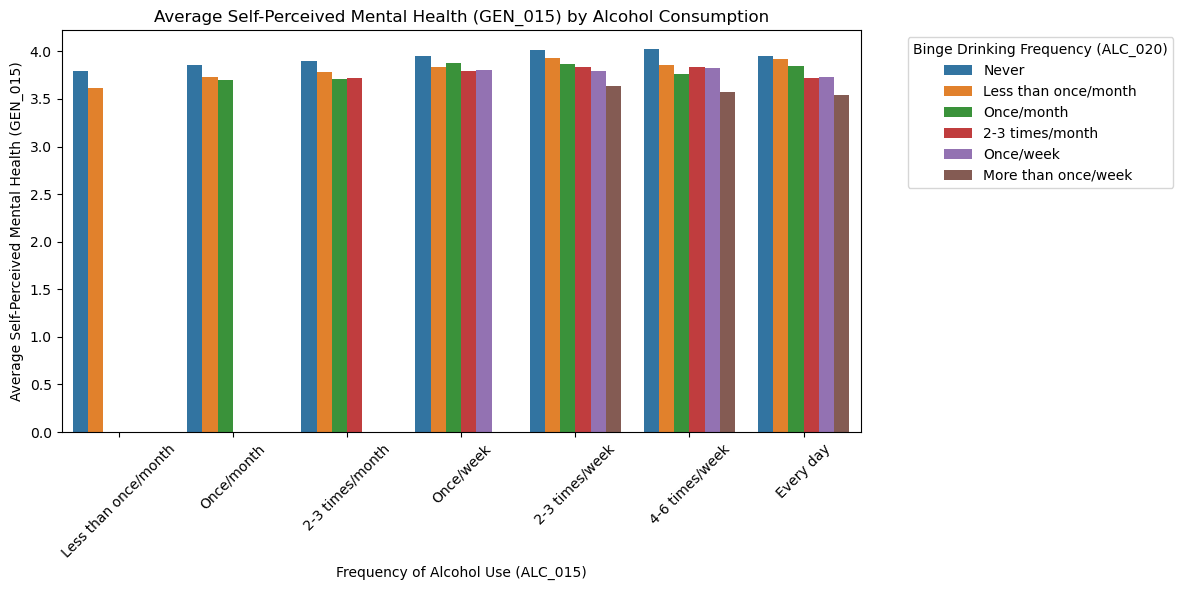

In [158]:
avg_scores_num=df_q3.groupby(['ALC_015','ALC_020'])['GEN_015'].mean().reset_index()
alc_015_labels = {
    1: 'Less than once/month',
    2: 'Once/month',
    3: '2-3 times/month',
    4: 'Once/week',
    5: '2-3 times/week',
    6: '4-6 times/week',
    7: 'Every day'
}

# Mapping for ALC_020
alc_020_labels = {
    1: 'Never',
    2: 'Less than once/month',
    3: 'Once/month',
    4: '2-3 times/month',
    5: 'Once/week',
    6: 'More than once/week',
}

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(alc_020_labels)))

# Replace the numeric values with the corresponding labels
avg_scores_num['ALC_015'] = avg_scores_num['ALC_015'].map(alc_015_labels)
avg_scores_num['ALC_020'] = avg_scores_num['ALC_020'].map(alc_020_labels)

alc_020_order = list(alc_020_labels.values())  #make sure correct order for categories
color_map = dict(zip(alc_020_order, colors))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_scores_num, x='ALC_015', y='GEN_015', hue='ALC_020', errorbar='sd',palette=color_map)
plt.title('Average Self-Perceived Mental Health (GEN_015) by Alcohol Consumption')
plt.xlabel('Frequency of Alcohol Use (ALC_015)')
plt.ylabel('Average Self-Perceived Mental Health (GEN_015)')
plt.legend(title='Binge Drinking Frequency (ALC_020)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

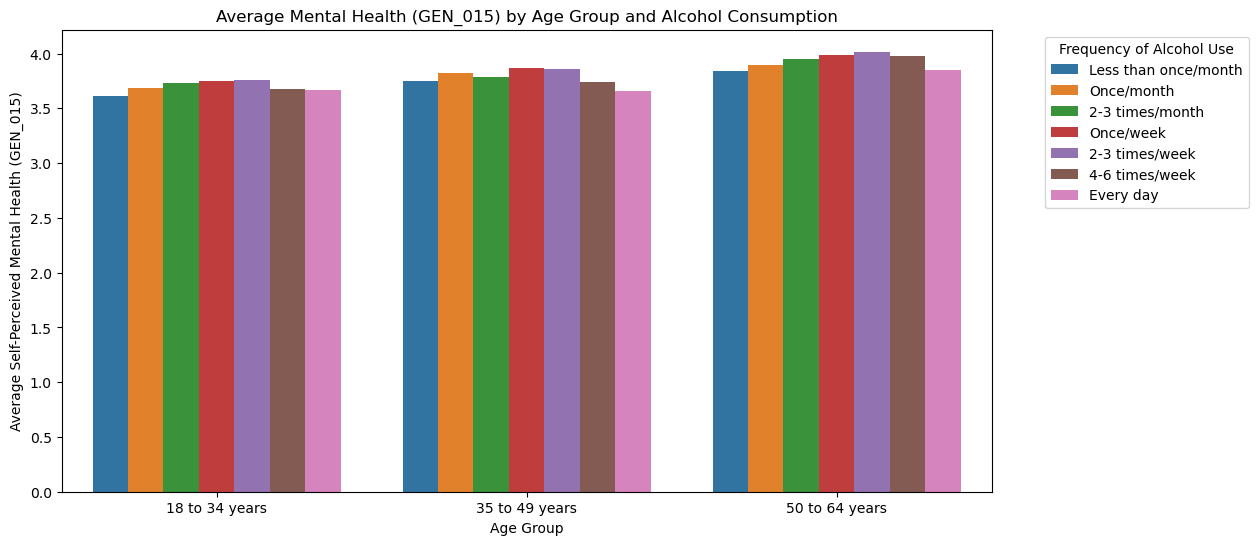

In [206]:
avg_scores2 = df_q3a.groupby(['DHHGAGE', 'ALC_015'])['GEN_015'].mean().reset_index()
alc_015_labels = {
    1: 'Less than once/month',
    2: 'Once/month',
    3: '2-3 times/month',
    4: 'Once/week',
    5: '2-3 times/week',
    6: '4-6 times/week',
    7: 'Every day'
}
age_group={1:"12 to 17 years",2:"18 to 34 years",3:"35 to 49 years",4:"50 to 64 years",5:"65 and older"}

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(alc_015_labels)))

avg_scores2['ALC_015'] = avg_scores2['ALC_015'].map(alc_015_labels)
avg_scores2['DHHGAGE'] = avg_scores2['DHHGAGE'].map(age_group)

alc_015_order = list(alc_015_labels.values())  #correct order for categories
color_map = dict(zip(alc_015_order, colors))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='DHHGAGE', y='GEN_015', hue='ALC_015', data=avg_scores2,palette=color_map)
plt.title('Average Self-Perceived Mental Health by Age Group and Alcohol Consumption')
plt.xlabel('Age Group')
plt.ylabel('Average Self-Perceived Mental Health (GEN_015)')
plt.legend(title='Frequency of Alcohol Use',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

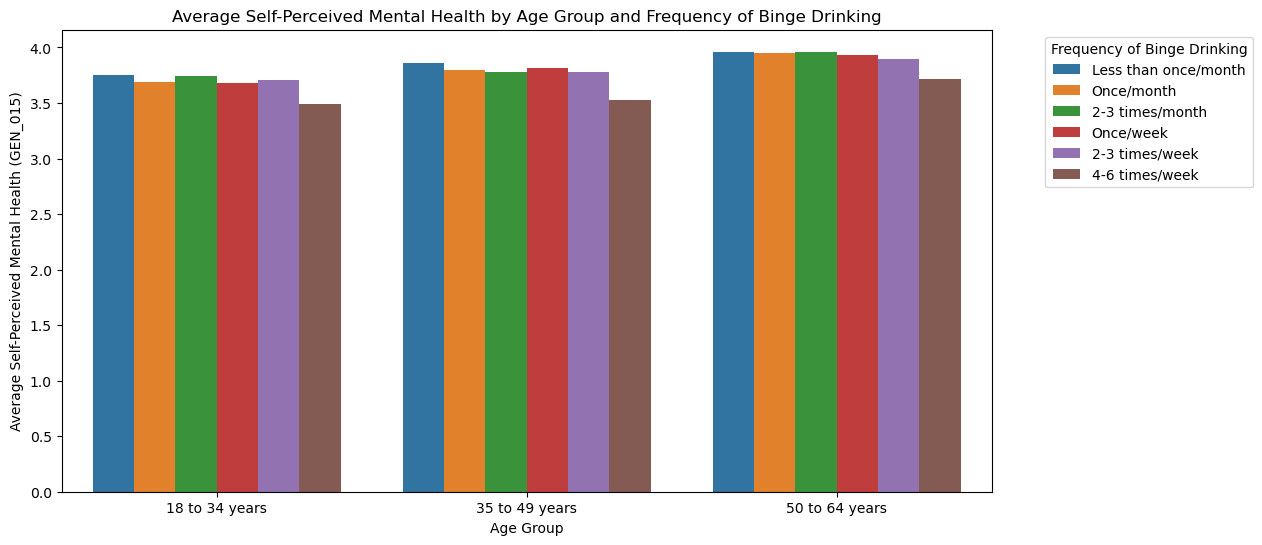

In [208]:
avg_scores3 = df_q3a.groupby(['DHHGAGE', 'ALC_020'])['GEN_015'].mean().reset_index()
alc_020_labels = {
    1: 'Never',
    2: 'Less than once/month',
    3: 'Once/month',
    4: '2-3 times/month',
    5: 'Once/week',
    6: 'More than once/week',
}
age_group={1:"12 to 17 years",2:"18 to 34 years",3:"35 to 49 years",4:"50 to 64 years",5:"65 and older"}
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, len(alc_015_labels)))

avg_scores3['ALC_020'] = avg_scores3['ALC_020'].map(alc_020_labels)
avg_scores3['DHHGAGE'] = avg_scores3['DHHGAGE'].map(age_group)

alc_020_order = list(alc_020_labels.values())  #correct order for categories
color_map = dict(zip(alc_020_order, colors))
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='DHHGAGE', y='GEN_015', hue='ALC_020', data=avg_scores3,palette=color_map)
plt.title('Average Self-Perceived Mental Health by Age Group and Frequency of Binge Drinking')
plt.xlabel('Age Group')
plt.ylabel('Average Self-Perceived Mental Health (GEN_015)')
plt.legend(title='Frequency of Binge Drinking',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [53]:
avg_scores2=df_q3.groupby(['alc_freq','alc_binge_freq'])['GEN_015'].mean().reset_index()

,ALC_015,ALC_020,GEN_015
0,Less than once/month,Never,2.209569
1,Less than once/month,Less than once/month,2.387646
2,Once/month,Never,2.139122
3,Once/month,Less than once/month,2.268638
4,Once/month,Once/month,2.303571
5,2-3 times/month,Never,2.097115
6,2-3 times/month,Less than once/month,2.215217
7,2-3 times/month,Once/month,2.290373
8,2-3 times/month,2-3 times/month,2.282642
9,Once/week,Never,2.053232


In [186]:
def correlation_by_age_group(df_q3a, age_groups):
    subset = df[df['DHHGAGE'] == age_groups]
    correlation_matrix = subset[['ALC_015', 'ALC_020', 'GEN_010', 'GEN_015', 'GEN_020', 'CCC_195']].corr()
    return correlation_matrix

correlation_age_2 = correlation_by_age_group(df_q3a, 2)
correlation_age_3 = correlation_by_age_group(df_q3a, 3)
correlation_age_4 = correlation_by_age_group(df_q3a, 4)
print(correlation_age_2,'\n')
print(correlation_age_3,'\n')
print(correlation_age_4,'\n')

          ALC_015   ALC_020   GEN_010   GEN_015   GEN_020   GEN_025   CCC_195
ALC_015  1.000000  0.983240  0.164439  0.090640 -0.050064  0.133627  0.006576
ALC_020  0.983240  1.000000  0.169376  0.096260 -0.050068  0.135741  0.003939
GEN_010  0.164439  0.169376  1.000000  0.608348  0.000800  0.321417 -0.026061
GEN_015  0.090640  0.096260  0.608348  1.000000  0.276161  0.348616 -0.270980
GEN_020 -0.050064 -0.050068  0.000800  0.276161  1.000000  0.255721 -0.154394
GEN_025  0.133627  0.135741  0.321417  0.348616  0.255721  1.000000 -0.107167
CCC_195  0.006576  0.003939 -0.026061 -0.270980 -0.154394 -0.107167  1.000000 

          ALC_015   ALC_020   GEN_010   GEN_015   GEN_020   GEN_025   CCC_195
ALC_015  1.000000  0.978882  0.061693  0.055584 -0.045482  0.095676 -0.011540
ALC_020  0.978882  1.000000  0.060847  0.055587 -0.045690  0.098158 -0.011705
GEN_010  0.061693  0.060847  1.000000  0.385858 -0.026275  0.200562  0.045737
GEN_015  0.055584  0.055587  0.385858  1.000000  0.275672  0.3

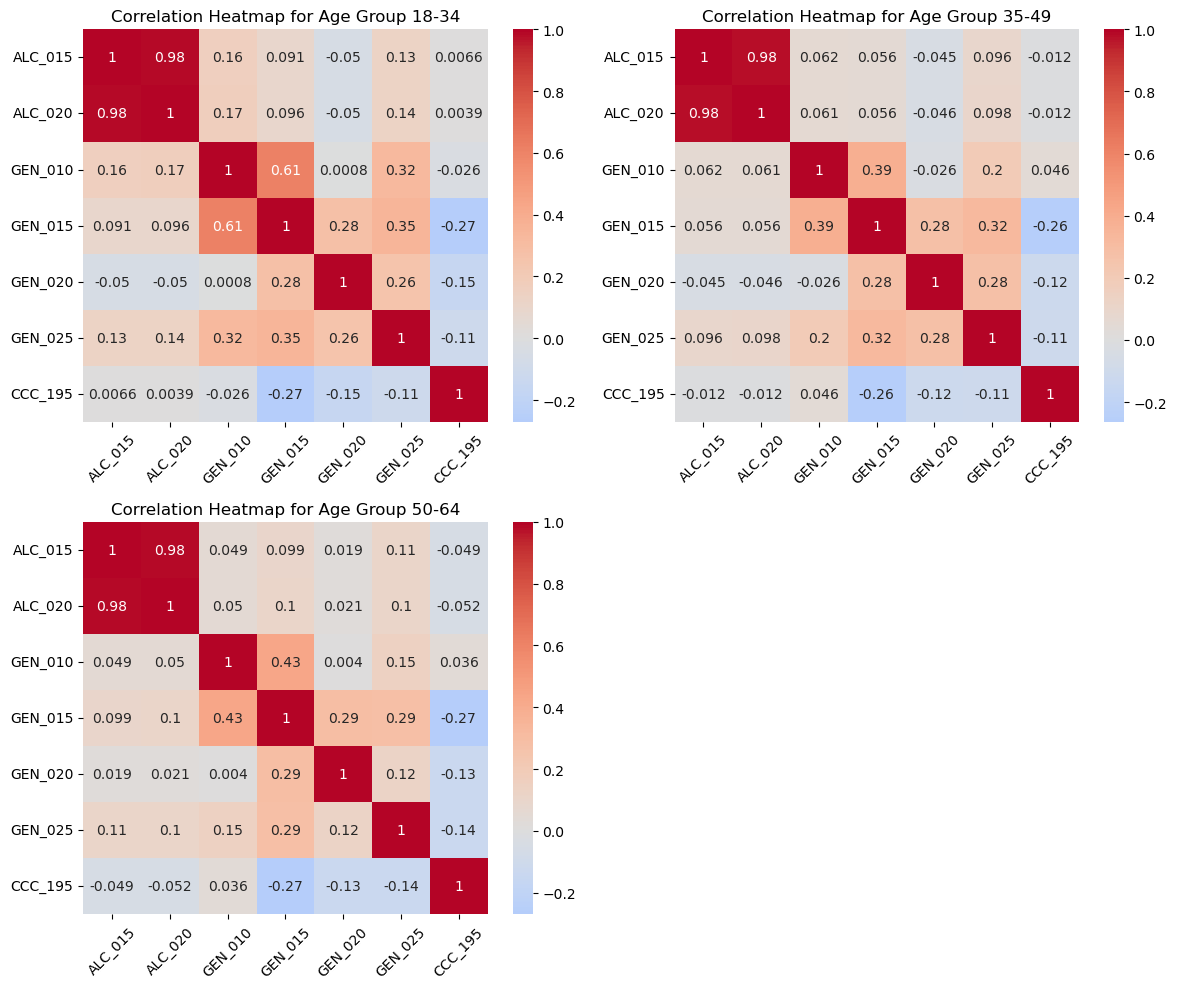

In [217]:
labels = {
    'ALC_015': 'Alcohol Use Frequency',
    'ALC_020': 'Binge Drinking Frequency',
    'GEN_010': 'Life Satisfaction',
    'GEN_015': 'Self-Perceived Mental Health',
    'GEN_020': 'Perceived Life Stress',
    'CCC_195': 'Mood Disorders',
    'DHHGAGE': 'Age Group'
}
correlation_age_2 = correlation_by_age_group(df_q3a, 2)
correlation_age_3 = correlation_by_age_group(df_q3a, 3)
correlation_age_4 = correlation_by_age_group(df_q3a, 4)

correlation_age_2.rename(columns=labels,index=labels, inplace=True)
correlation_age_3.rename(columns=labels,index=labels, inplace=True)
correlation_age_4.rename(columns=labels,index=labels, inplace=True)
#heatmaps for the 3 age groups
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(correlation_age_2, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap for Age Group 18-34')
axes[0, 0].set_xticklabels(correlation_age_2.columns, rotation=45)
axes[0, 0].set_yticklabels(correlation_age_2.index, rotation=0)

sns.heatmap(correlation_age_3, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap for Age Group 35-49')
axes[0, 1].set_xticklabels(correlation_age_3.columns, rotation=45)
axes[0, 1].set_yticklabels(correlation_age_3.index, rotation=0)

sns.heatmap(correlation_age_4, annot=True, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap for Age Group 50-64')
axes[1, 0].set_xticklabels(correlation_age_4.columns, rotation=45)
axes[1, 0].set_yticklabels(correlation_age_4.index, rotation=0)

fig.delaxes(axes[1, 1])  #rmv empty plot

plt.tight_layout()
plt.show()